In [1]:
import os
os.chdir(r'/Users/rmccrickerd/desktop/jdheston')

In [2]:
import numpy as np
import pandas as pd
from jdheston import jdheston as jdh
from jdheston import utils as uts
from jdheston import config as cfg
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.special import gamma
from scipy.optimize import minimize
# import mpl
# %matplotlib inline

In [3]:
nx = np.newaxis
cfg.config(scale=1.5,print_keys=False)

In [4]:
df = pd.read_excel('data/ccy-date.xlsx')
df

,GBP,USD,Unnamed: 2,Bloomberg BGN,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,ATM,NaN,25D Call GBP,NaN,25D Put GBP,NaN,10D Call GBP,NaN,10D Put GBP,NaN
1,NaN,Mid,Spread,Mid,Spread,Mid,Spread,Mid,Spread,Mid,Spread
2,1M,6.27,0.7,6.41,0.88,6.64,0.88,6.848,1.599,7.283,1.598
3,3M,6.99,0.7,6.93,0.88,7.692,0.879,7.266,1.598,8.687,1.596
4,6M,8.885,0.75,8.514,0.942,10.147,0.942,8.671,1.711,11.685,1.708
5,1Y,9.61,0.65,9.209,0.816,10.936,0.816,9.355,1.481,12.565,1.48


In [5]:
deltas = np.array([0.05,0.1,0.25,0.5,0.75,0.9,0.95])
expiries = np.array([1/52,1/12,3/12,6/12,1,2])
labels = ['1w','1m','3m','6m','1y','2y']

In [6]:
m,n = len(expiries),len(deltas)
mid_vols = np.zeros((m,n))
spreads = np.zeros((m,n))

In [7]:
mid_vols = np.array([[22.92,20.79,18.41,16.43,15.11,14.19,13.94],
                     [22.30,19.69,16.32,13.71,12.10,11.31,11.23],
                     [24.62,21.73,17.66,14.11,11.85,11.01,11.04],
                     [25.39,22.44,18.18,14.32,11.88,11.14,11.38],
                     [25.98,23.22,18.95,14.84,12.13,11.23,11.43],
                     [25.39,23.08,19.44,15.88,13.46,12.51,12.60]])/100

In [8]:
logstrikes = norm.ppf(deltas[nx,:])*mid_vols*np.sqrt(expiries[:,nx]) - 0.5*mid_vols**2*expiries[:,nx]

In [9]:
mid_vols

array([[0.2292, 0.2079, 0.1841, 0.1643, 0.1511, 0.1419, 0.1394],
       [0.223 , 0.1969, 0.1632, 0.1371, 0.121 , 0.1131, 0.1123],
       [0.2462, 0.2173, 0.1766, 0.1411, 0.1185, 0.1101, 0.1104],
       [0.2539, 0.2244, 0.1818, 0.1432, 0.1188, 0.1114, 0.1138],
       [0.2598, 0.2322, 0.1895, 0.1484, 0.1213, 0.1123, 0.1143],
       [0.2539, 0.2308, 0.1944, 0.1588, 0.1346, 0.1251, 0.126 ]])

In [10]:
np.round(logstrikes,3)

array([[-0.053, -0.037, -0.018, -0.   ,  0.014,  0.025,  0.032],
       [-0.108, -0.074, -0.033, -0.001,  0.023,  0.041,  0.053],
       [-0.21 , -0.145, -0.063, -0.002,  0.038,  0.069,  0.089],
       [-0.311, -0.216, -0.095, -0.005,  0.053,  0.098,  0.129],
       [-0.461, -0.325, -0.146, -0.011,  0.074,  0.138,  0.181],
       [-0.655, -0.472, -0.223, -0.025,  0.11 ,  0.211,  0.277]])

In [11]:
plt.rcParams['figure.figsize'] = [4,12]
plt.rcParams['legend.loc'] = 'lower left'

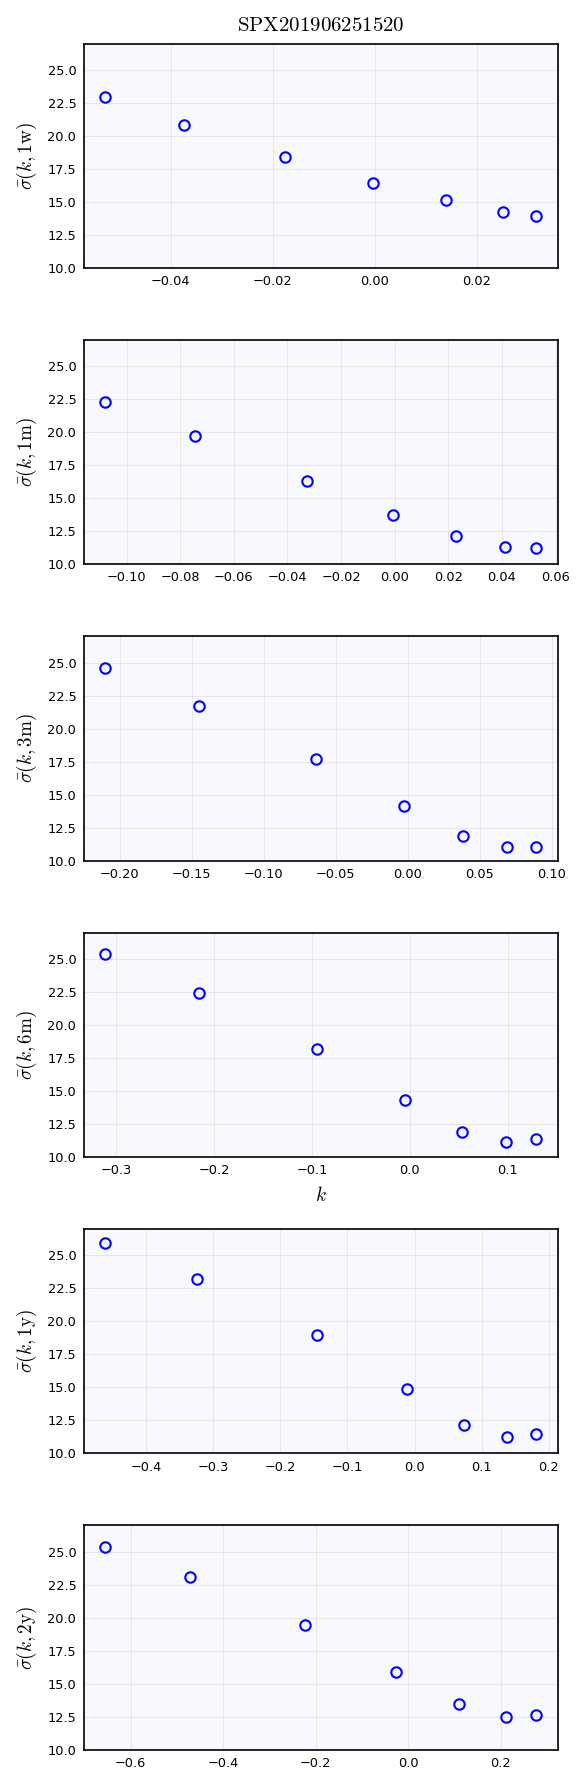

In [12]:
plot,axes = plt.subplots(m)
for i in range(m):
        axes[i].plot(logstrikes[i,:], 100*mid_vols[i,:],'bo')
        axes[i].set_ylabel(r'$\bar{\sigma}(k,\mathrm{%s})$'%labels[i])
        axes[i].set_ylim([10,27])
#         axes[i].set_xlim([0,1])
axes[0].set_title(r'$\mathrm{SPX:20190625:1520}$')
axes[3].set_xlabel(r'$k$')
plt.tight_layout()
# fname = r'LSR-comparison'
# plt.savefig(fname)

In [13]:
vols = mid_vols.copy()

In [14]:
vol_surface = jdh.vol_surface(expiries[:,nx], deltas[nx,:], vols)

In [15]:
vol_surface.fit_jheston()

C:\Users\rmccrickerd\desktop\jdheston\jdheston\jdheston.py:210: RuntimeWarning: invalid value encountered in cdouble_scalars
  return np.exp((1 - a - np.sqrt((1 - a)**2 + (σ*v)**2*u*(i + u)))/v**2*t)
C:\Users\rmccrickerd\desktop\jdheston\jdheston\jdheston.py:218: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  p = 1 - 1/np.pi*np.exp(k/2)*quad(jheston_integrand,0,u,args=(t,k,Θ))[0]
C:\Users\rmccrickerd\desktop\jdheston\jdheston\jdheston.py:218: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose in

,sigma,rho,vee,rmse
0.019231,0.173570,-0.555315,0.088792,0.001082
0.083333,0.152483,-0.607482,0.270745,0.000555
0.250000,0.161294,-0.670077,0.532117,0.001099
0.500000,0.165189,-0.657899,0.798303,0.001916
1.000000,0.170040,-0.684014,1.079340,0.002591
2.000000,0.175609,-0.639085,1.269048,0.002111


In [17]:
sigma_max = np.max(vol_surface.jheston['sigma'])
sigma_max = 0.3

In [18]:
T = np.array([1/52,1/12,3/12,6/12,1,2])[:,nx]
# M = ['1W','1M','3M','6M','9M','1Y']
Δ = np.linspace(5,95,19)[nx,:]/100
k = norm.ppf(Δ)*sigma_max*np.sqrt(T)
k = logstrikes

In [19]:
# pd.DataFrame(k,index=T[:,0],columns=np.round(Δ[0,:],2))

In [20]:
vol_surface.jheston

,sigma,rho,vee,rmse
0.019231,0.173570,-0.555315,0.088792,0.001082
0.083333,0.152483,-0.607482,0.270745,0.000555
0.250000,0.161294,-0.670077,0.532117,0.001099
0.500000,0.165189,-0.657899,0.798303,0.001916
1.000000,0.170040,-0.684014,1.079340,0.002591
2.000000,0.175609,-0.639085,1.269048,0.002111


In [21]:
sigma = np.array(vol_surface.jheston['sigma'])
sigma

array([0.17357001, 0.15248339, 0.16129413, 0.16518869, 0.17004038,
       0.17560869])

In [22]:
average_vols = np.array(vol_surface.jheston['sigma'].copy())
forward_vols = average_vols.copy()
for i in np.arange(1,m):
    forward_vols[i] = np.sqrt((average_vols[i]**2*T[i,0] - average_vols[i-1]**2*T[i-1,0])/(T[i,0] - T[i-1,0]))

In [23]:
forward_vols

array([0.17357001, 0.14556295, 0.16552372, 0.16899353, 0.17475743,
       0.18100579])

In [24]:
# jump fit
# jump_weight = 0.99
# rho = -0.35
# vee =  1.0

In [25]:
# diffusion fit
# jump_weight = 0.01
# rho = -0.35
# vee =  2.5

In [26]:
# jump-diffusion fit
jump_weight = 0.5
rho = -0.9
vee =  1.0

In [27]:
jump_sigma = jump_weight**0.5*forward_vols
diff_sigma = (1 - jump_weight)**0.5*forward_vols
jump_sigma, diff_sigma

(array([0.12273253, 0.10292855, 0.11704295, 0.11949647, 0.12357216,
        0.12799042]),
 array([0.12273253, 0.10292855, 0.11704295, 0.11949647, 0.12357216,
        0.12799042]))

In [28]:
times1   = np.array([0,1/52,1/12,3/12,6/12,1])
sigma1   = jump_sigma
rho1     = np.array([rho])*np.ones_like(times1)
vee1     = np.array([vee])*np.ones_like(times1)
epsilon1 = np.array([ 0.0])*np.ones_like(times1)

In [29]:
times2   = np.array([0,1/52,1/12,3/12,6/12,1])
sigma2   = diff_sigma
rho2     = np.array([rho])*np.ones_like(times2)
vee2     = np.array([vee])*np.ones_like(times2)
epsilon2 = np.array([ 1.0])*np.ones_like(times2)

In [30]:
params1  = np.array([times1, sigma1, rho1, vee1, epsilon1]).T
params2  = np.array([times2, sigma2, rho2, vee2, epsilon2]).T

In [31]:
np.round(params1,3)

array([[ 0.   ,  0.123, -0.9  ,  1.   ,  0.   ],
       [ 0.019,  0.103, -0.9  ,  1.   ,  0.   ],
       [ 0.083,  0.117, -0.9  ,  1.   ,  0.   ],
       [ 0.25 ,  0.119, -0.9  ,  1.   ,  0.   ],
       [ 0.5  ,  0.124, -0.9  ,  1.   ,  0.   ],
       [ 1.   ,  0.128, -0.9  ,  1.   ,  0.   ]])

In [32]:
np.round(params2,3)

array([[ 0.   ,  0.123, -0.9  ,  1.   ,  1.   ],
       [ 0.019,  0.103, -0.9  ,  1.   ,  1.   ],
       [ 0.083,  0.117, -0.9  ,  1.   ,  1.   ],
       [ 0.25 ,  0.119, -0.9  ,  1.   ,  1.   ],
       [ 0.5  ,  0.124, -0.9  ,  1.   ,  1.   ],
       [ 1.   ,  0.128, -0.9  ,  1.   ,  1.   ]])

In [33]:
maturities = T
logstrikes = k

In [34]:
# call_prices = jdh.jdh_pricer(maturities, logstrikes, params1)
call_prices = jdh.jdh2f_pricer(maturities, logstrikes, [params1, params2])

In [35]:
implied_vols = jdh.surface(maturities, logstrikes, call_prices)

In [36]:
# pd.DataFrame(implied_vols,index=T[:,0],columns=Δ[0,:])

In [37]:
# plt.rcParams['figure.figsize'] = [2*1.618*2,2*3]
# plt.rcParams['legend.loc'] = 'lower left'

In [38]:
plt.rcParams['figure.figsize'] = [3,3*9/16]

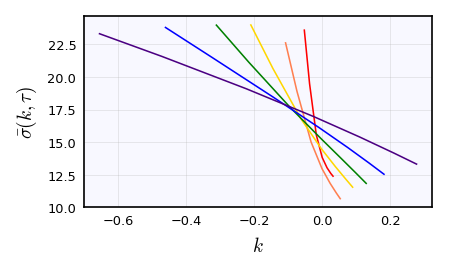

In [39]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*implied_vols[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')
# plt.savefig('temp')

In [40]:
implied_vars = implied_vols*np.sqrt(T)
Δ = norm.cdf(k/implied_vars + 0.5*implied_vars)

In [41]:
plt.rcParams['figure.figsize'] = [4,8]
plt.rcParams['legend.loc'] = 'upper right'

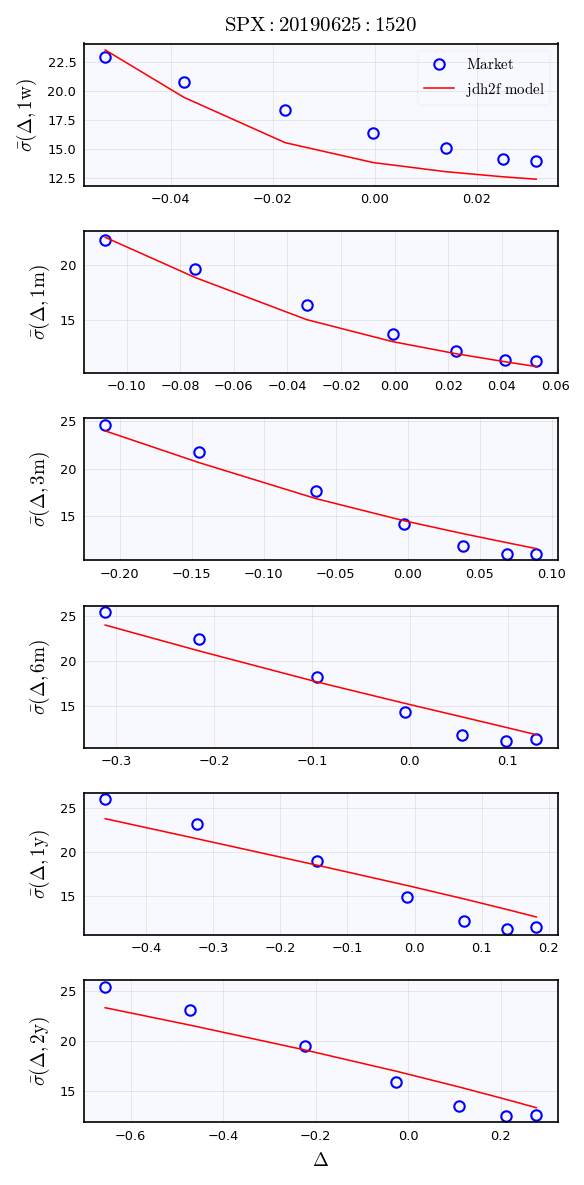

In [42]:
plot,axes = plt.subplots(m)
for i in range(len(T[:,0])):
    axes[i].plot(k[i,:],100*mid_vols[i,:],'bo')
    axes[i].plot(k[i,:],100*implied_vols[i,:])
#     axes[i].set_xlim([0,1])
#     axes[i].set_ylim([5,15])
    axes[i].set_ylabel(r'$\bar{\sigma}(\Delta,\mathrm{%s})$'%labels[i])
axes[0].set_title(r'$\mathrm{SPX:20190625:1520}$')
axes[0].legend([r'$\mathrm{Market}$',r'$\mathrm{jdh2f\ model}$'])
axes[-1].set_xlabel(r'$\Delta$')
plt.tight_layout()
# plt.savefig('plots/jump-diffusion-fit')

In [72]:
eps2 = 1.0

In [73]:
T = vol_surface.expiries
k = vol_surface.logstrikes
vols = vol_surface.vols

In [74]:
def rmse(x):
    jump_weight, rho1, rho2, vee1, vee2 = x
    
    jump_sigma = jump_weight**0.5*forward_vols
    diff_sigma = (1 - jump_weight)**0.5*forward_vols
    
    sigma1   = jump_sigma
    rho1     = np.array([rho1])*np.ones_like(sigma1)
    vee1     = np.array([vee1])*np.ones_like(sigma1)
    
    sigma2   = diff_sigma
    rho2     = np.array([rho2])*np.ones_like(sigma2)
    vee2     = np.array([vee2])*np.ones_like(sigma2)
    epsilon2 = np.array([eps2])*np.ones_like(sigma2)
    
    params1  = np.array([times1, sigma1, rho1, vee1, epsilon1]).T
    params2  = np.array([times2, sigma2, rho2, vee2, epsilon2]).T
    
    call_prices = jdh.jdh2f_pricer(T, k, [params1, params2])
    model_vols = jdh.surface(T, k, call_prices)
    
    rmse = np.sqrt(np.mean((model_vols - vols)**2))
    return rmse

In [75]:
x0 = 0.5,  -1, -1,  1.0,  1.0 # for epsilon = 1.0

In [76]:
results = minimize(rmse, x0,
                   method = 'L-BFGS-B',
                   # args = (expiry, logstrikes, vols),
                   bounds = ((0.05,0.95), (-1,1), (-1,1), (0,10), (0,10)),
                   options = {'maxiter': 3}
              )
results

      fun: 0.011908798008975622
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.01051594,  0.00567387,  0.00668112, -0.00402354, -0.00698823])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 24
      nit: 3
   status: 1
  success: False
        x: array([ 0.38440658, -1.        , -1.        ,  1.14232971,  1.14710881])

In [77]:
jump_weight, rho1, rho2, vee1, vee2 = results.x

In [78]:
T = np.array([1/52,1/12,3/12,6/12,1,2])[:,nx]
# M = ['1W','1M','3M','6M','9M','1Y']
Δ = np.linspace(5,95,19)[nx,:]/100
k = norm.ppf(Δ)*0.3*np.sqrt(T)

In [79]:
jump_sigma = jump_weight**0.5*forward_vols
diff_sigma = (1 - jump_weight)**0.5*forward_vols

sigma1   = jump_sigma
rho1     = np.array([rho1])*np.ones_like(sigma1)
vee1     = np.array([vee1])*np.ones_like(sigma1)

sigma2   = diff_sigma
rho2     = np.array([rho2])*np.ones_like(sigma2)
vee2     = np.array([vee2])*np.ones_like(sigma2)
epsilon2 = np.array([eps2])*np.ones_like(sigma2)

params1  = np.array([times1, sigma1, rho1, vee1, epsilon1]).T
params2  = np.array([times2, sigma2, rho2, vee2, epsilon2]).T

call_prices = jdh.jdh2f_pricer(T, k, [params1, params2])
implied_vols = jdh.surface(T, k, call_prices)
    
implied_vars = implied_vols*np.sqrt(T)
Δ = norm.cdf(k/implied_vars + 0.5*implied_vars)

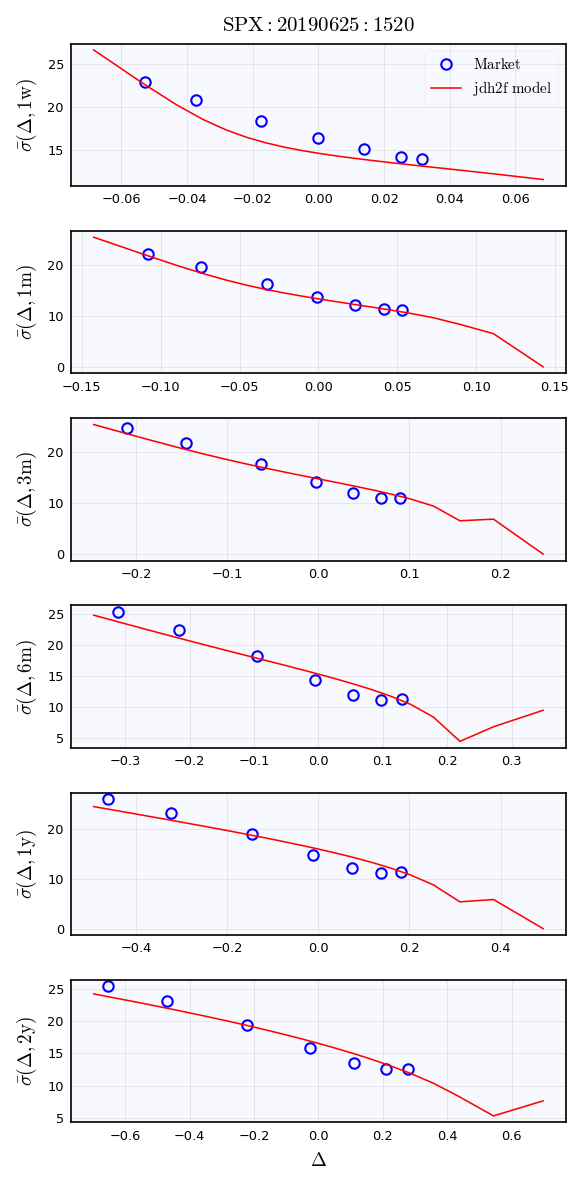

In [80]:
plot,axes = plt.subplots(m)
for i in range(len(T[:,0])):
    axes[i].plot(logstrikes[i,:], 100*mid_vols[i,:],'bo')
    axes[i].plot(k[i,:],100*implied_vols[i,:])
    
#     axes[i].plot(deltas, mid_vols[i,:] + spreads[i,:]/2,'b_')
#     axes[i].plot(deltas, mid_vols[i,:] - spreads[i,:]/2,'b_')
    
#     axes[i].set_xlim([0,1])
    # axes[i].set_ylim([5,14])
    axes[i].set_ylabel(r'$\bar{\sigma}(\Delta,\mathrm{%s})$'%labels[i])
axes[0].set_title(r'$\mathrm{SPX:20190625:1520}$')
axes[0].legend([r'$\mathrm{Market}$',r'$\mathrm{jdh2f\ model}$'])
axes[-1].set_xlabel(r'$\Delta$')
plt.tight_layout()
# plt.savefig('plots/jump-diffusion-fit')